In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [202]:
df = pd.read_csv("***csv file***", encoding='latin-1')
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


In [86]:
df.describe()

,Activity Period,Passenger Count,Adjusted Passenger Count,Year
count,15007.000000,15007.000000,15007.000000,15007.000000
mean,201045.073366,29240.521090,29331.917105,2010.385220
std,313.336196,58319.509284,58284.182219,3.137589
min,200507.000000,1.000000,1.000000,2005.000000
25%,200803.000000,5373.500000,5495.500000,2008.000000
50%,201011.000000,9210.000000,9354.000000,2010.000000
75%,201308.000000,21158.500000,21182.000000,2013.000000
max,201603.000000,659837.000000,659837.000000,2016.000000


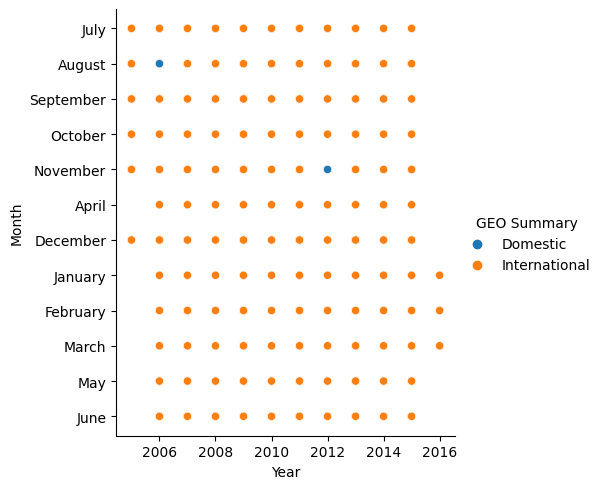

In [87]:
sns.relplot(data=df, x='Year', y='Month', hue='GEO Summary')

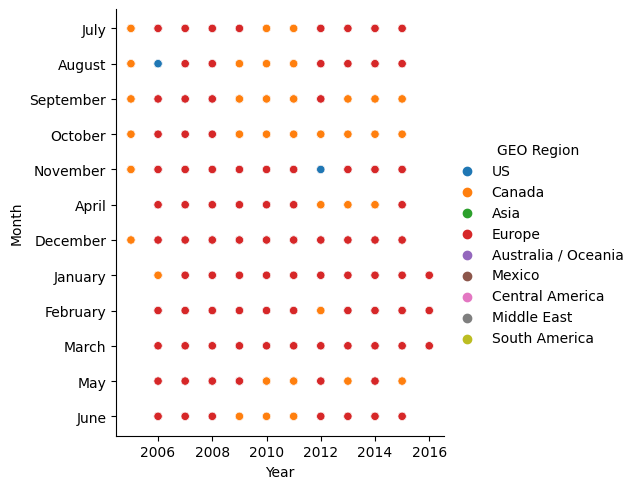

In [88]:
sns.relplot(data=df, x='Year', y='Month', hue='GEO Region')

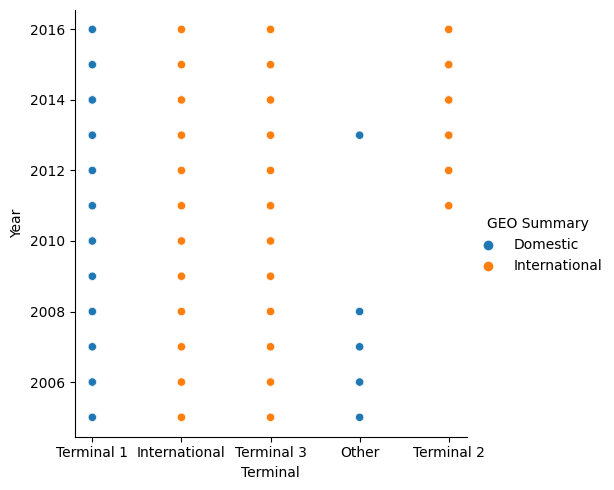

In [214]:
sns.relplot(data=df, x='Terminal', y='Year', hue= 'GEO Summary')

In [218]:
res = df[['Terminal', 'GEO Summary']].groupby('GEO Summary').max()
res

,Terminal
GEO Summary,
Domestic,Terminal 3
International,Terminal 3


In [219]:
df.shape

(15007, 16)

In [220]:
df.nunique()

Activity Period                  129
Operating Airline                 77
Operating Airline IATA Code       73
Published Airline                 68
Published Airline IATA Code       64
GEO Summary                        2
GEO Region                         9
Activity Type Code                 3
Price Category Code                2
Terminal                           5
Boarding Area                      8
Passenger Count                11699
Adjusted Activity Type Code        3
Adjusted Passenger Count       11702
Year                              12
Month                             12
dtype: int64

In [221]:
df.duplicated().sum()

0

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              15007 non-null  int64 
 1   Operating Airline            15007 non-null  object
 2   Operating Airline IATA Code  14953 non-null  object
 3   Published Airline            15007 non-null  object
 4   Published Airline IATA Code  14953 non-null  object
 5   GEO Summary                  15007 non-null  object
 6   GEO Region                   15007 non-null  object
 7   Activity Type Code           15007 non-null  object
 8   Price Category Code          15007 non-null  object
 9   Terminal                     15007 non-null  object
 10  Boarding Area                15007 non-null  object
 11  Passenger Count              15007 non-null  int64 
 12  Adjusted Activity Type Code  15007 non-null  object
 13  Adjusted Passenger Count     15

In [223]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

In [224]:
res = df.select_dtypes(include=['object'])
res

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Adjusted Activity Type Code,Month
0,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,Deplaned,July
1,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,Enplaned,July
2,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,Thru / Transit * 2,July
3,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,Deplaned,July
4,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,Enplaned,July
...,...,...,...,...,...,...,...,...,...,...,...,...
15002,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,Enplaned,March
15003,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,Deplaned,March
15004,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,Enplaned,March
15005,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,Deplaned,March


In [225]:
label_encoder = LabelEncoder()

categorical_columns = ['Operating Airline', 'Operating Airline IATA Code', 'Published Airline', 'Published Airline IATA Code', 'GEO Summary', 'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal', 'Boarding Area', 'Adjusted Activity Type Code', 'Month']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [226]:
imputer = KNNImputer()
x = imputer.fit_transform(df)
df = pd.DataFrame(x, columns=df.columns)
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507.0,0.0,60.0,0.0,54.0,0.0,8.0,0.0,0.0,2.0,1.0,27271.0,0.0,27271.0,2005.0,5.0
1,200507.0,0.0,60.0,0.0,54.0,0.0,8.0,1.0,0.0,2.0,1.0,29131.0,1.0,29131.0,2005.0,5.0
2,200507.0,0.0,60.0,0.0,54.0,0.0,8.0,2.0,0.0,2.0,1.0,5415.0,2.0,10830.0,2005.0,5.0
3,200507.0,4.0,6.0,4.0,6.0,1.0,2.0,0.0,1.0,2.0,1.0,35156.0,0.0,35156.0,2005.0,5.0
4,200507.0,4.0,6.0,4.0,6.0,1.0,2.0,1.0,1.0,2.0,1.0,34090.0,1.0,34090.0,2005.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603.0,71.0,64.0,62.0,58.0,0.0,8.0,1.0,0.0,3.0,3.0,194636.0,1.0,194636.0,2016.0,7.0
15003,201603.0,71.0,64.0,62.0,58.0,1.0,5.0,0.0,0.0,0.0,0.0,4189.0,0.0,4189.0,2016.0,7.0
15004,201603.0,71.0,64.0,62.0,58.0,1.0,5.0,1.0,0.0,3.0,3.0,4693.0,1.0,4693.0,2016.0,7.0
15005,201603.0,72.0,63.0,63.0,57.0,1.0,4.0,0.0,1.0,0.0,0.0,12313.0,0.0,12313.0,2016.0,7.0


In [227]:
df.isnull().sum()

Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
Adjusted Activity Type Code    0
Adjusted Passenger Count       0
Year                           0
Month                          0
dtype: int64

<Axes: >

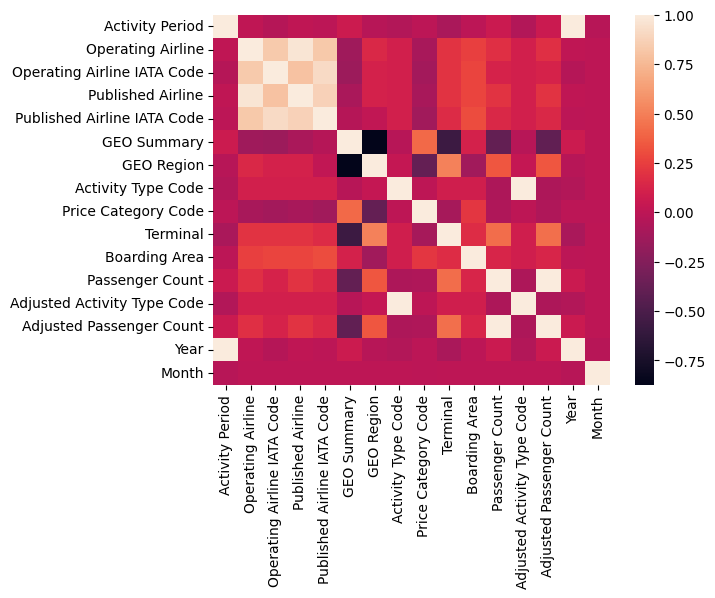

In [228]:
sns.heatmap(df.corr())

In [229]:
def importdata(): 
    balance_data = df
      
    print ("Dataset Length: ", len(balance_data)) 
    print ("Dataset Shape: ", balance_data.shape) 
      
    return balance_data 

In [240]:
def splitdataset(balance_data): 
  
    X = df.drop(['GEO Summary'], axis=1)
    Y = df['Terminal']
  
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2) 
      
    return X, Y, X_train, X_test, y_train, y_test

In [247]:
def train_using_gini(X_train, X_test, y_train): 
  
    clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth = 2) 
  
    clf_gini.fit(X_train, y_train)
    print(clf_gini.score(X_train, y_train))
    return clf_gini 

In [248]:
def train_using_entropy(X_train, X_test, y_train): 
  
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = 2) 
  
    clf_entropy.fit(X_train, y_train)
    print(clf_entropy.score(X_train, y_train))
    return clf_entropy

In [249]:
def prediction(X_test, clf_object): 
  
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:\n") 
    print(y_pred)
    return y_pred

In [255]:
def cal_accuracy(X_test, y_test, y_pred): 
      
    print("Confusion Matrix:\n", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy: ", 
    accuracy_score(y_test,y_pred) * 100)
      
    print("Report:\n", 
    classification_report(y_test, y_pred)) 

In [256]:
def main(): 
      
    data = importdata() 
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = train_using_entropy(X_train, X_test, y_train) 
      
    print("Results Using Gini Index:\n") 
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(X_test, y_test, y_pred_gini) 
      
    print("Results Using Entropy:\n") 
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(X_test, y_test, y_pred_entropy)

In [257]:
if __name__=="__main__": 
    main()

Dataset Length:  15007
Dataset Shape:  (15007, 16)
0.9773427738442315
0.9773427738442315
Results Using Gini Index:

Predicted values:

[0. 4. 2. ... 0. 2. 0.]
Confusion Matrix:
 [[1795    0    0    0    0]
 [   0    0    0    0   10]
 [   0    0  673    0    0]
 [   0    0    0    0   69]
 [   0    0    0    0  455]]
Accuracy:  97.36842105263158
Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1795
         1.0       0.00      0.00      0.00        10
         2.0       1.00      1.00      1.00       673
         3.0       0.00      0.00      0.00        69
         4.0       0.85      1.00      0.92       455

    accuracy                           0.97      3002
   macro avg       0.57      0.60      0.58      3002
weighted avg       0.95      0.97      0.96      3002

Results Using Entropy:

Predicted values:

[0. 4. 2. ... 0. 2. 0.]
Confusion Matrix:
 [[1795    0    0    0    0]
 [   0    0    0    0   10]
 [   0    0 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.